<a href="https://colab.research.google.com/github/ardiwirya/geografis-jakarta/blob/main/Peta_Penduduk_Provinsi_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div class ="alert alert-block alert-info"><font size=5.5><r><b><center><span style="color:light">Analisis Statistik dan Visualisasi Geografis untuk Provinsi Jakarta beserta Jumlah Penduduknya</span></center></i></b></font>
Nama: Ulva Mahira<br>
NIM: 210170102<br>
Mata Kuliah: Sistem Informasi Geografis (A5)<br>

In [ ]:
# PENTING: JALANKAN SEL INI UNTUK IMPOR SUMBER DATA KAGGLE ANDA
# KE LOKASI YANG BENAR (/kaggle/input) DI NOTEBOOK ANDA,
# LALU ANDA BEBAS UNTUK MENGHAPUS SEL INI.
# CATATAN: LINGKUNGAN BUKU CATATAN INI BERBEDA DARI PYTHON KAGGLE
# LINGKUNGAN SEHINGGA MUNGKIN HILANG PERPUSTAKAAN YANG DIGUNAKAN BUKU CATATAN ANDA.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'indonesiaprovincejmlpenduduk:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F449598%2F849905%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240630%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240630T084106Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D32638fe49c19f8881df12f85311b4a90e7b91ed1d449075caf2af9e51cfd0a4631cf1c9ef9b0ac459d05f64f34b5c6cb70fa84ee0233f08f894544ed3550899672bc07286a84949a8e187517ed710ff784c91e6b9273c1e91e4f54ad3e8377039adb8e77b0ab1c838a1be1ba38f017c296137f26d1ade229e0ef9eac2c1e50ef1d82022eafe1acca3945af700b28c4137c2825f538599851b297b874415c4758118ec1ea0cc728017170823ea15f3013a9786b40ba4a54d118bb3d3c30b1cf72389b11a1f763896634c4d16ea906eac505e7b022c046f19aacdf83998f2628b614733ad8d5af2d66522b4be8a06d1b4ce9ae1ebe51725e81ccb46a7157667b9e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4569346 bytes downloaded
Downloaded and uncompressed: indonesiaprovincejmlpenduduk
Data source import complete.


<img src="https://cdn.pixabay.com/photo/2015/04/09/16/39/indonesia-714747_960_720.png" width=150 height=130 align=center />

# Visualisasi peta sederhana menggunakan Geopanda

Halo, pecinta data!

Anda akan mempelajari cara membuat visualisasi berbasis peta menggunakan perpustakaan geopanda. geopanda membuat panda semakin keren dengan menambahkan operasi spasial!

Dataset yang digunakan disini adalah __[data espasial provinsi di Indonesia](https://github.com/superpikar/indonesia-geojson)__ bergabung dengan __[jumlah penduduk tahun 2010 menurut BPS](https://www.bps.go.id/statictable/2009/02/20/1267/penduduk-indonesia-menurut-provinsi-1971-1980-1990-1995-2000-dan-2010.html)__.

Enjoy,
Ulva

In [ ]:
import geopandas as gpd

filename = '../input/indonesiaprovincejmlpenduduk/indonesia-province-jml-penduduk.json' # Data jumlah penduduk irian jaya timur dan irian jaya tengah diambil dari provinsi papua dibagi dua
df = gpd.read_file(filename)
print(type(df))
df # lihat seluruh datanya

<class 'geopandas.geodataframe.GeoDataFrame'>


,ID,kode,Propinsi,SUMBER,Jumlah Penduduk,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885..."
5,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,32382657,"MULTIPOLYGON (((108.82934 -6.74608, 108.83061 ..."
6,7,36,PROBANTEN,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,10632166,"MULTIPOLYGON (((106.72134 -6.09000, 106.71294 ..."
7,8,35,JAWA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,37476757,"MULTIPOLYGON (((111.69460 -6.75286, 111.69649 ..."
8,9,81,MALUKU UTARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1038087,"MULTIPOLYGON (((127.74207 0.81629, 127.74280 0..."
9,10,82,MALUKU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1533506,"MULTIPOLYGON (((130.83130 -3.47141, 130.83050 ..."


<Axes: >

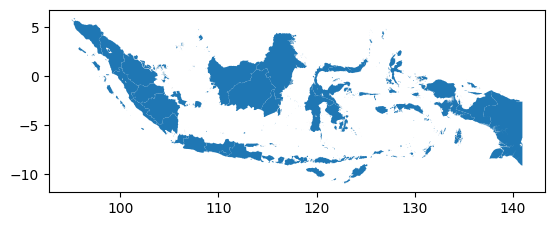

In [ ]:
df.plot() # plot seluruh Indonesia, sumbu x untuk garis bujur, sumbu y untuk garis lintang

In [ ]:
df.set_index("Propinsi", inplace=True) # sehingga Anda bisa mendapatkan baris tertentu berdasarkan provinsinya
df.head() # kembalikan 5 baris pertama, lihat bagaimana Propinsi sekarang ditetapkan sebagai indeks (kolom paling kiri)

,ID,kode,SUMBER,Jumlah Penduduk,geometry
Propinsi,,,,,
IRIAN JAYA TIMUR,1,85,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ..."
NUSATENGGARA BARAT,2,52,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ..."
GORONTALO,3,75,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1..."
SULAWESI TENGGARA,4,74,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ..."
DAERAH ISTIMEWA YOGYAKARTA,5,34,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885..."


In [ ]:
df.loc['JAWA TIMUR'] # hanya menampilkan data spesifik JAWA TIMUR

ID                                                                 8
kode                                                              35
SUMBER                     Peta Dasar BAKOSURTANAL Skala 1 : 250.000
Jumlah Penduduk                                             37476757
geometry           MULTIPOLYGON (((111.694595 -6.752857, 111.6964...
Name: JAWA TIMUR, dtype: object

In [ ]:
series = gpd.GeoSeries(df.loc['JAWA TIMUR']['geometry']) # dapatkan geometri JAWA TIMUR dan ubah menjadi GeoSeries
type(series)

geopandas.geoseries.GeoSeries

<Axes: >

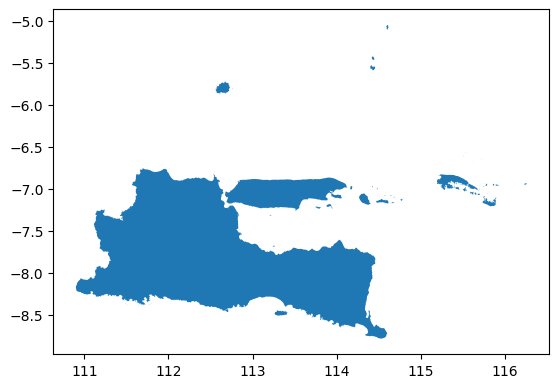

In [ ]:
ax = series.plot() # membuat plot JAWA TIMUR
ax

**Kuis: Membuat Peta Plot DKI Jakarta**

<Axes: >

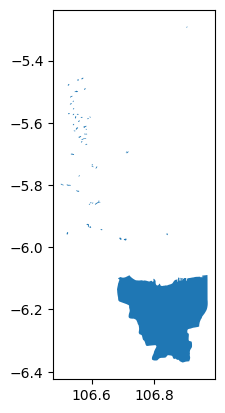

In [ ]:
series = gpd.GeoSeries(df.loc['DKI JAKARTA']['geometry']) # dapatkan geometri DKI Jakarta dan ubah menjadi GeoSeries
type(series)
ax = series.plot() # membuat kavling DKI Jakarta
ax

**Peta Choropleth Indonesia berdasarkan jumlah penduduk** <br>
Sekadar informasi, __[peta choropleth](https://en.wikipedia.org/wiki/Choropleth_map)__ adalah jenis peta tematik yang areanya diarsir atau dipola sesuai dengan ukuran variabel statistik yang ditampilkan di peta, seperti jumlah penduduk, kepadatan penduduk, atau pendapatan per kapita.

<Axes: >

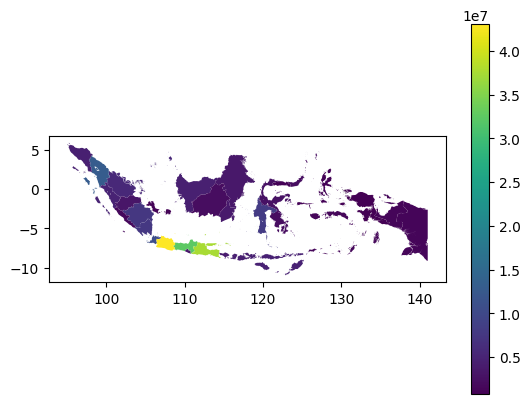

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df = df[df['Jumlah Penduduk'].notnull()] # pilih baris yang Jumlah Penduduknya bukan nol, untuk berjaga-jaga
df.plot(column='Jumlah Penduduk', ax=ax, legend=True)

<Axes: >

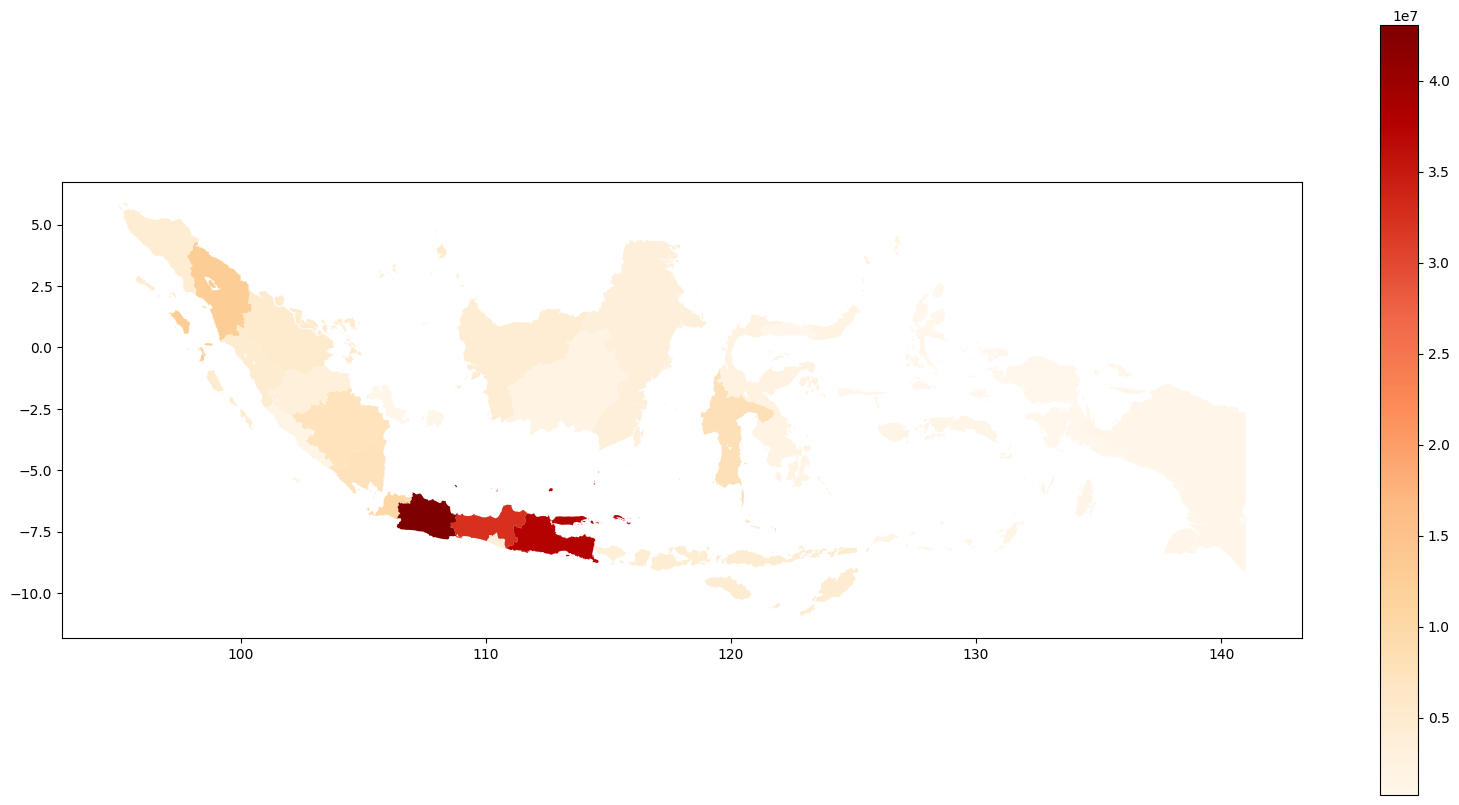

In [ ]:
# jika Anda tidak terlalu menyukai skema warna di atas, mari kita ulangi dengan skema warna lain
# kali ini juga dengan ukuran yang lebih besar
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df.plot(column='Jumlah Penduduk', ax=ax, legend=True, cmap='OrRd')

**BERHASIL!** <br>

Program mampu memvisualisasikan peta `choropleth`, Kita bisa menyesuaikan tekniknya dengan permasalahan lain, seperti visualisasi lalu lintas transportasi, visualisasi kebakaran hutan, visualisasi kesenjangan ekonomi, dan sebagainya. <br>

# Terima kasih atas perhatian dan kerjasamanya.

Apabila ada kekurangan, mohon dimaafkan dan saya sangat menghargai saran serta masukan yang diberikan. Semoga kita bisa terus belajar dan berkembang bersama.
